In [301]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [302]:
df = pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
df_in = pd.read_csv("Train_Inpatientdata-1542865627584.csv")
df_out = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
train=pd.read_csv("Train-1542865627584.csv")
print("Train Beneficiary data" ,df.shape)
print("Train Inpatient data",df_in.shape)
print("Train Outpatient data",df_out.shape)
print("Train",train.shape)

Train Beneficiary data (138556, 25)
Train Inpatient data (40474, 30)
Train Outpatient data (517737, 27)
Train (5410, 2)


In [303]:
df.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50


In [304]:
df_in.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN


In [305]:
df_out.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380


In [306]:
df["Gender"].replace({2: 0}, inplace=True)
df['DOD'].fillna(0,inplace=True)
df['DOD']=df['DOD'].apply(lambda x: 1 if x!=0 else 0)
df['DOB'] = pd.to_datetime(df['DOB'])
df['DOB_year'] = pd.DatetimeIndex(df['DOB']).year

In [307]:
df.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'DOB_year'],
      dtype='object')

In [308]:
df_col=['BeneID', 'DOB_year', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County','ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt',]

In [309]:
df_ben_in= df_in.merge(df[df_col], how='left', on='BeneID')
df_ben_out= df_out.merge(df[df_col], how='left', on='BeneID')

In [310]:
df_ben_in= df_ben_in.merge(train, how='left', on='Provider')
df_ben_out= df_ben_out.merge(train, how='left', on='Provider')

In [311]:
df_ben_in.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,1,1,2,1,1,36000,3204,60,70,Yes
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,1,1,2,1,1,36000,3204,60,70,No
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,1,1,2,1,1,36000,3204,60,70,No
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,1,2,2,1,1,5000,1068,250,320,No
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,2,1,2,2,2,21260,2136,120,100,No


In [312]:
df_ben_out.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,2,1,2,2,2,0,0,90,40,No
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,2,1,2,2,2,0,0,90,40,No
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes


In [313]:
print(df_ben_in.shape)
print(df_ben_out.shape)

(40474, 53)
(517737, 50)


# Potential Fraud distribution with respect to In patient and Out patient Data

In [314]:
Pf_in = pd.DataFrame(df_ben_in['PotentialFraud'].value_counts())
Pf_out = pd.DataFrame(df_ben_out['PotentialFraud'].value_counts())

print("In patient Data")
per_yes_in = (Pf_in['PotentialFraud']['Yes']/Pf_in['PotentialFraud'].sum())*100
print('Percentage of fraud Data  : ',per_yes_in)
per_no_in = (Pf_in['PotentialFraud']['No']/Pf_in['PotentialFraud'].sum())*100
print('percentage of non fraud Data : ',per_no_in)

print("Out patient Data")
per_yes_out = (Pf_out['PotentialFraud']['Yes']/Pf_out['PotentialFraud'].sum())*100
print('Percentage of fraud Data  : ',per_yes_out)
per_no_out = (Pf_out['PotentialFraud']['No']/Pf_out['PotentialFraud'].sum())*100
print('percentage of non fraud Data : ',per_no_out)


In patient Data
Percentage of fraud Data  :  57.81983495577408
percentage of non fraud Data :  42.18016504422592
Out patient Data
Percentage of fraud Data  :  36.58112130290089
percentage of non fraud Data :  63.4188786970991


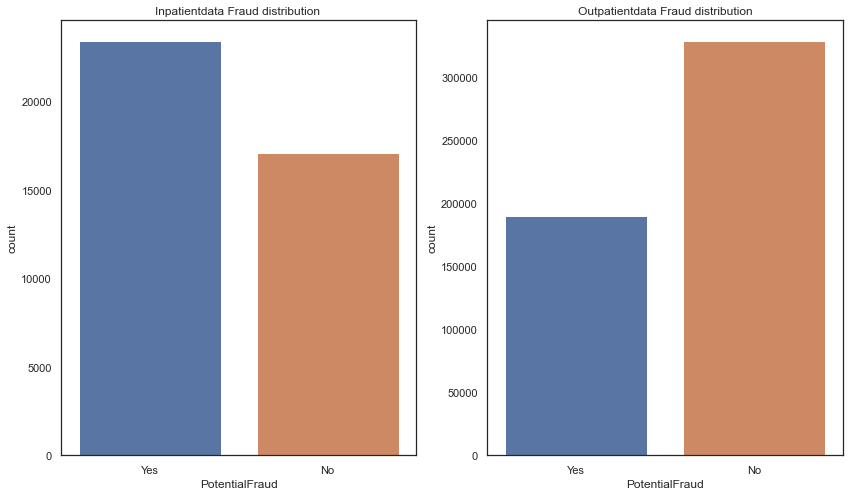

In [348]:
#Fraud with respect to In or out patient data
fig ,axes= plt.subplots(1,2,figsize=(14,8))

x =sns.countplot(data =df_ben_in, x='PotentialFraud' , ax=axes[0])
x.title.set_text('Inpatientdata Fraud distribution ')
y= sns.countplot(data =df_ben_out, x='PotentialFraud', ax=axes[1])
y.title.set_text('Outpatientdata Fraud distribution')
plt.show()


# Potential Fraud distribution with respect to Provider

In [316]:
prov_in =df_ben_in.groupby('Provider')['PotentialFraud'].value_counts().nlargest(10)
prov_out=df_ben_out.groupby('Provider')['PotentialFraud'].value_counts().nlargest(10)

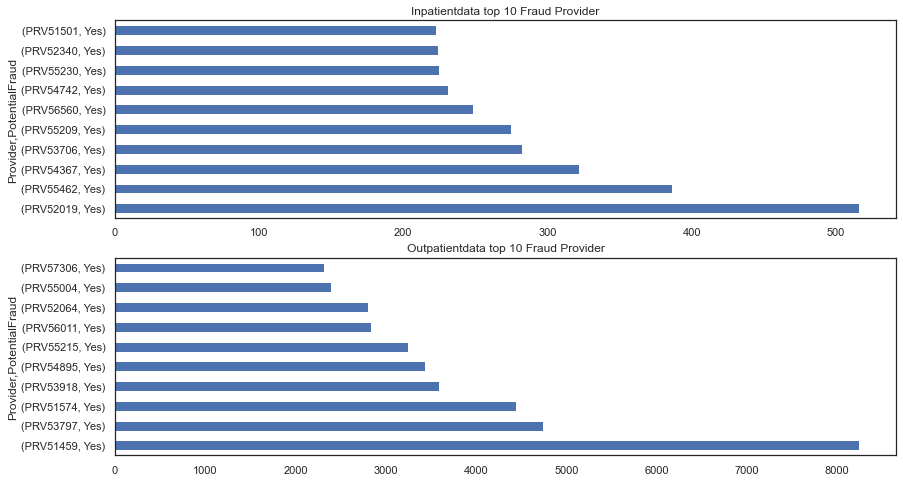

In [349]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =prov_in.plot( x=df_ben_in['Provider'] , kind = 'barh',ax=axes[0])
x.title.set_text('Inpatientdata top 10 Fraud Provider')
y= prov_out.plot(x=df_ben_out['Provider'] , kind = 'barh',ax=axes[1])
y.title.set_text('Outpatientdata top 10 Fraud Provider')
plt.show()

# Potential Fraud distribution with respect to AttendingPhysician

In [318]:
phy_in =df_ben_in.groupby('AttendingPhysician')['PotentialFraud'].value_counts().nlargest(10)
phy_out =df_ben_in.groupby('AttendingPhysician')['PotentialFraud'].value_counts().nlargest(10)

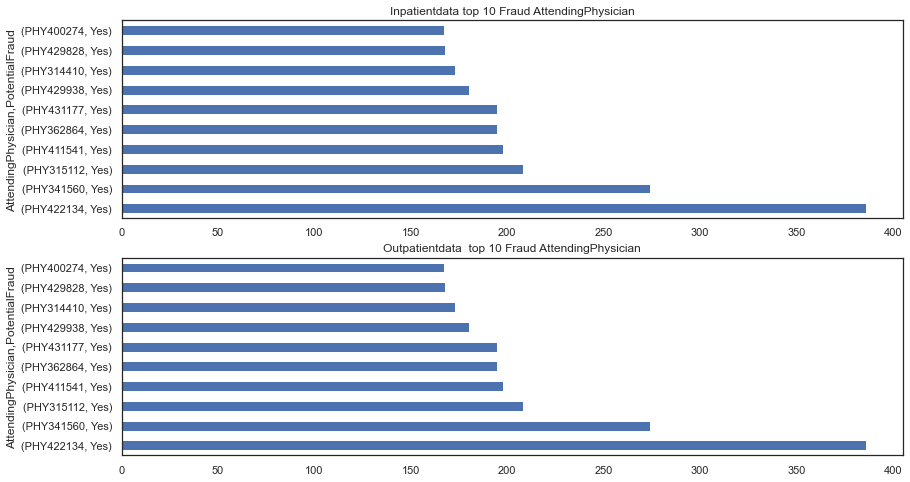

In [350]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =phy_in.plot( x=df_ben_in['AttendingPhysician'] , kind = 'barh',ax=axes[0])
x.title.set_text('Inpatientdata top 10 Fraud AttendingPhysician')
y= phy_out.plot(x=df_ben_out['AttendingPhysician'] , kind = 'barh',ax=axes[1])
y.title.set_text('Outpatientdata  top 10 Fraud AttendingPhysician')
plt.show()

# Potential Fraud distribution with respect to OperatingPhysician

In [320]:
opr_in =df_ben_in.groupby('OperatingPhysician')['PotentialFraud'].value_counts().nlargest(10)
opr_out =df_ben_in.groupby('OperatingPhysician')['PotentialFraud'].value_counts().nlargest(10)

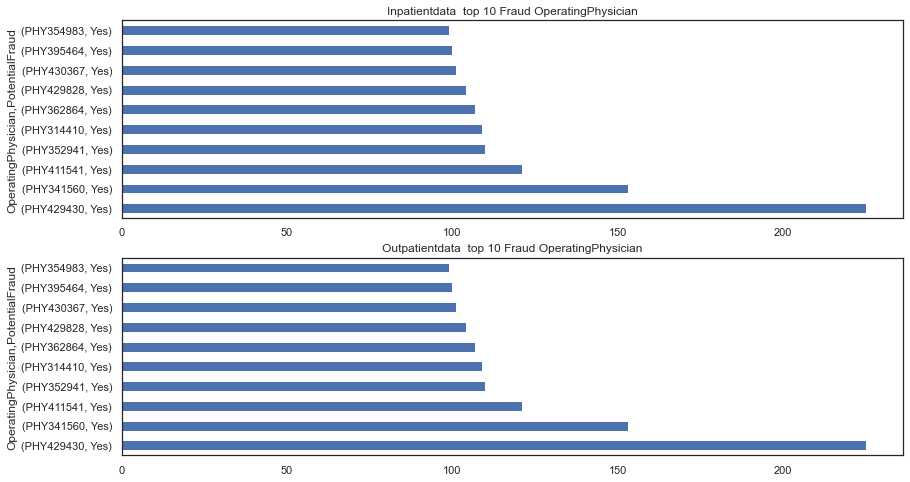

In [351]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =opr_in.plot( x=df_ben_in['OperatingPhysician'] , kind = 'barh',ax=axes[0])
x.title.set_text('Inpatientdata  top 10 Fraud OperatingPhysician')
y= opr_out.plot(x=df_ben_out['OperatingPhysician'] , kind = 'barh',ax=axes[1])
y.title.set_text('Outpatientdata  top 10 Fraud OperatingPhysician')
plt.show()

# Potential Fraud distribution with respect to OtherPhysician

In [322]:
oth_in =df_ben_in.groupby('OtherPhysician')['PotentialFraud'].value_counts().nlargest(10)
oth_out =df_ben_in.groupby('OtherPhysician')['PotentialFraud'].value_counts().nlargest(10)

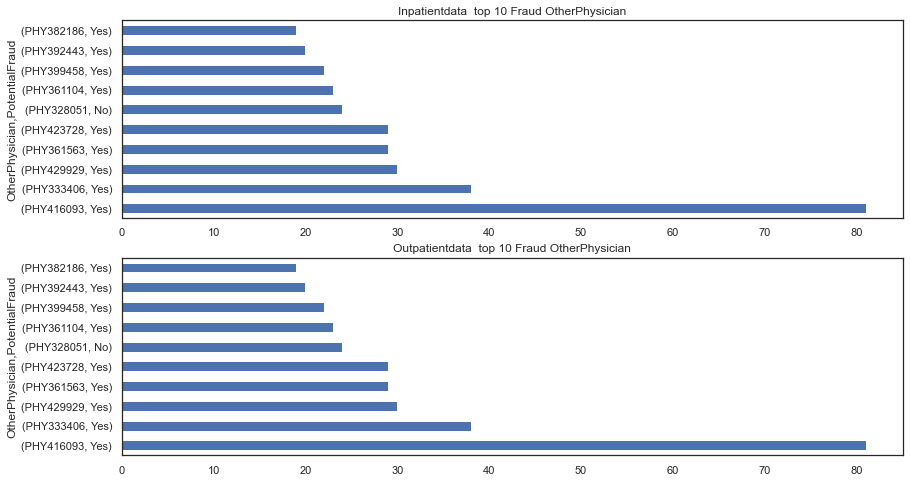

In [352]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =oth_in.plot( x=df_ben_in['OtherPhysician'] , kind = 'barh',ax=axes[0])
x.title.set_text('Inpatientdata  top 10 Fraud OtherPhysician')
y= oth_out.plot(x=df_ben_out['OtherPhysician'] , kind = 'barh',ax=axes[1])
y.title.set_text('Outpatientdata  top 10 Fraud OtherPhysician')
plt.show()

# Potential Fraud distribution with respect to Provider and AttendingPhysician

In [324]:
pro_ap_in = df_ben_in.groupby(['AttendingPhysician','Provider'])['PotentialFraud'].value_counts().nlargest(10)
pro_ap_out =df_ben_out.groupby(['AttendingPhysician','Provider'])['PotentialFraud'].value_counts().nlargest(10)

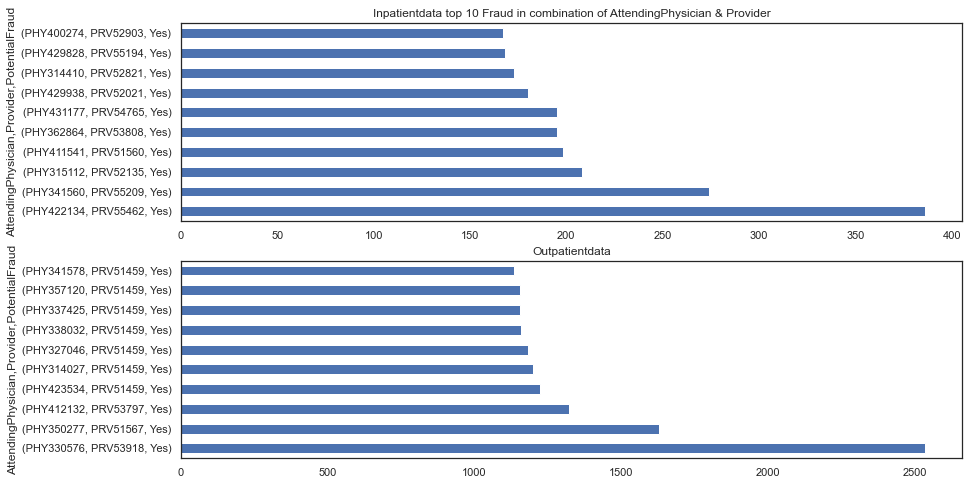

In [354]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =pro_ap_in.plot( x=pro_ap_in, kind = 'barh',ax=axes[0])
x.title.set_text('Inpatientdata top 10 Fraud in combination of AttendingPhysician & Provider')
y= pro_ap_out.plot(x=pro_ap_out , kind = 'barh',ax=axes[1])
y.title.set_text('Outpatientdata top 10 Fraud in combination of AttendingPhysician & Provider')
plt.show()

# Potential Fraud distribution with respect to BeneID

In [326]:
dene_in =df_ben_in.groupby('BeneID')['PotentialFraud'].value_counts().nlargest(10)
dene_out =df_ben_in.groupby('BeneID')['PotentialFraud'].value_counts().nlargest(10)

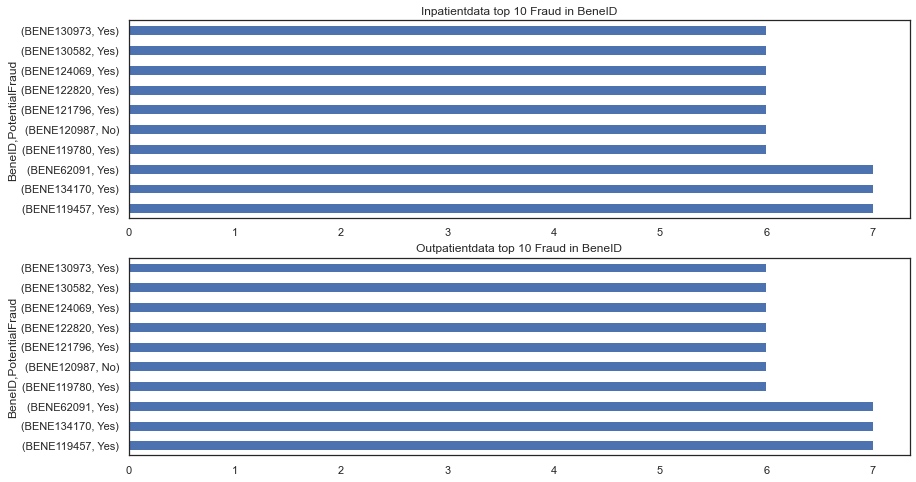

In [355]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =dene_in.plot( x=dene_in, kind = 'barh',ax=axes[0])
x.title.set_text('Inpatientdata top 10 Fraud in BeneID')
y= dene_out.plot(x=dene_out , kind = 'barh',ax=axes[1])
y.title.set_text('Outpatientdata top 10 Fraud in BeneID')
plt.show()

# Potential Fraud distribution with respect to AttendingPhysician and BeneID

In [328]:
bene_ap_in=df_ben_in.groupby(['BeneID','AttendingPhysician'])['PotentialFraud'].value_counts().nlargest(10)
bene_ap_out=df_ben_out.groupby(['BeneID','AttendingPhysician'])['PotentialFraud'].value_counts().nlargest(10)

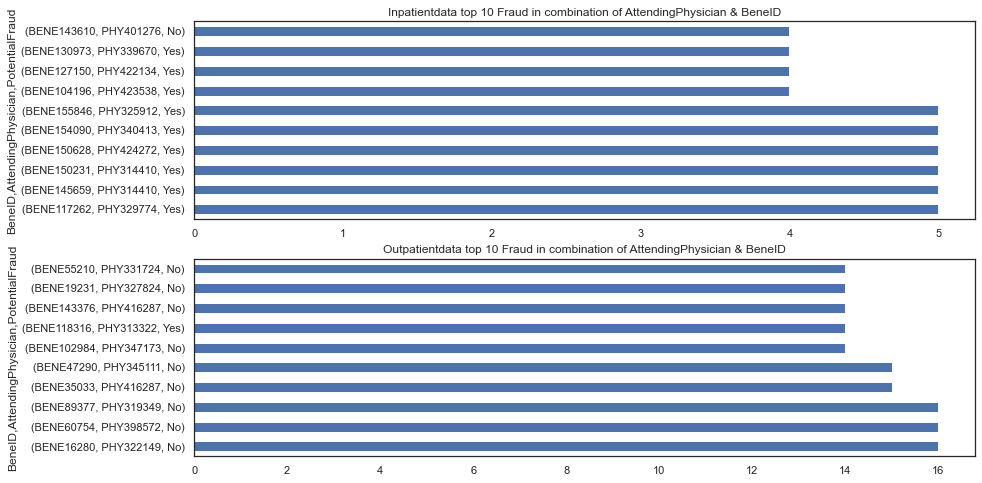

In [356]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =bene_ap_in.plot( x=bene_ap_in, kind = 'barh',ax=axes[0])
x.title.set_text('Inpatientdata top 10 Fraud in combination of AttendingPhysician & BeneID')
y= bene_ap_out.plot(x=bene_ap_out , kind = 'barh',ax=axes[1])
y.title.set_text('Outpatientdata top 10 Fraud in combination of AttendingPhysician & BeneID')
plt.show()

# Potential Fraud distribution with respect to State

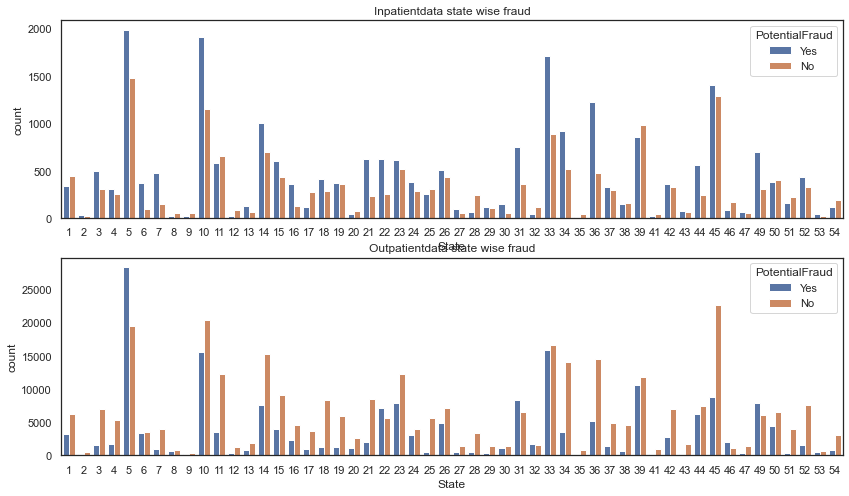

In [357]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =sns.countplot(data =df_ben_in,x='State', hue='PotentialFraud' , ax=axes[0])
x.title.set_text('Inpatientdata state wise fraud')
y= sns.countplot(data =df_ben_out,x='State', hue='PotentialFraud', ax=axes[1])
y.title.set_text('Outpatientdata state wise fraud')
plt.show()


# Potential Fraud distribution with respect to DiagnosisCode

In [331]:
DiagnosisCode_in = pd.DataFrame(columns = ['DiagnosisCode'])
DiagnosisCode_in['DiagnosisCode'] = pd.concat([df_ben_in["ClmDiagnosisCode_1"], 
                                           df_ben_in["ClmDiagnosisCode_2"], 
                                           df_ben_in["ClmDiagnosisCode_3"], 
                                           df_ben_in["ClmDiagnosisCode_4"],
                                           df_ben_in["ClmDiagnosisCode_5"], 
                                           df_ben_in["ClmDiagnosisCode_6"],
                                           df_ben_in["ClmDiagnosisCode_7"],
                                           df_ben_in["ClmDiagnosisCode_8"],
                                           df_ben_in["ClmDiagnosisCode_9"],
                                           df_ben_in["ClmDiagnosisCode_10"]], axis=0)

DiagnosisCode_out = pd.DataFrame(columns = ['DiagnosisCode'])
DiagnosisCode_out['DiagnosisCode'] = pd.concat([df_ben_out["ClmDiagnosisCode_1"], 
                                           df_ben_out["ClmDiagnosisCode_2"], 
                                           df_ben_out["ClmDiagnosisCode_3"], 
                                           df_ben_out["ClmDiagnosisCode_4"],
                                           df_ben_out["ClmDiagnosisCode_5"], 
                                           df_ben_out["ClmDiagnosisCode_6"],
                                           df_ben_out["ClmDiagnosisCode_7"],
                                           df_ben_out["ClmDiagnosisCode_8"],
                                           df_ben_out["ClmDiagnosisCode_9"],
                                           df_ben_out["ClmDiagnosisCode_10"]], axis=0)

In [332]:
DiagnosisCode_in_val = DiagnosisCode_in.value_counts().nlargest(10)
DiagnosisCode_out_val = DiagnosisCode_out.value_counts().nlargest(10)

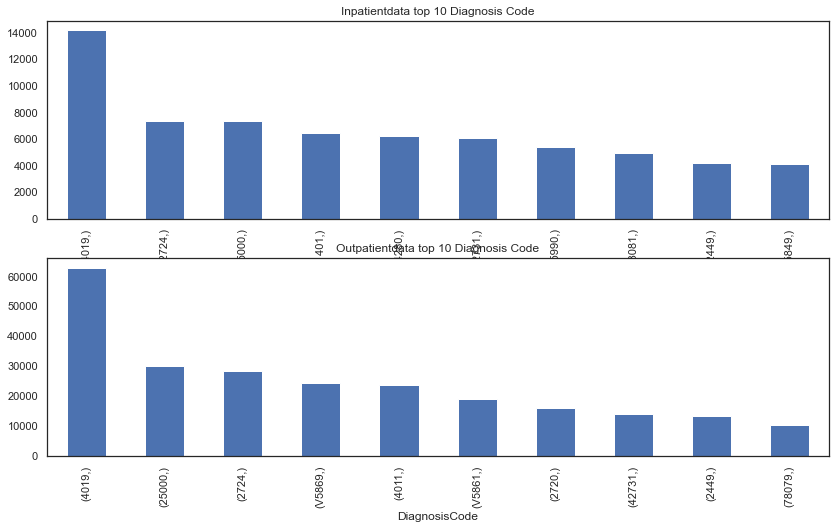

In [358]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =DiagnosisCode_in_val.plot(kind='bar', ax=axes[0])
x.title.set_text('Inpatientdata top 10 Diagnosis Code')
y= DiagnosisCode_out_val.plot(kind='bar', ax=axes[1])
y.title.set_text('Outpatientdata top 10 Diagnosis Code')
plt.show()

# Potential Fraud distribution with respect to ProcedureCode

In [334]:
ProcedureCode_in = pd.DataFrame(columns = ['ProcedureCode'])
ProcedureCode_in['ProcedureCode'] = pd.concat([df_ben_in["ClmProcedureCode_1"], 
                                           df_ben_in["ClmProcedureCode_2"], 
                                           df_ben_in["ClmProcedureCode_3"], 
                                           df_ben_in["ClmProcedureCode_4"],
                                           df_ben_in["ClmProcedureCode_5"], 
                                           df_ben_in["ClmProcedureCode_6"]], axis=0)

ProcedureCode_out = pd.DataFrame(columns = ['ProcedureCode'])
ProcedureCode_out['ProcedureCode'] = pd.concat([df_ben_out["ClmProcedureCode_1"], 
                                           df_ben_out["ClmProcedureCode_2"], 
                                           df_ben_out["ClmProcedureCode_3"], 
                                           df_ben_out["ClmProcedureCode_4"],
                                           df_ben_out["ClmProcedureCode_5"], 
                                           df_ben_out["ClmProcedureCode_6"]], axis=0)

In [335]:
ProcedureCode_in_val = ProcedureCode_in.value_counts().nlargest(10)
ProcedureCode_out_val = ProcedureCode_out.value_counts().nlargest(10)

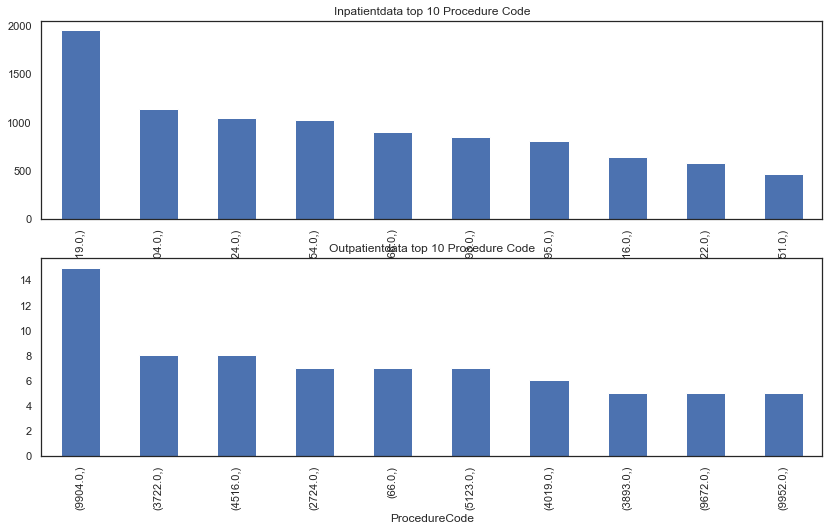

In [360]:
fig ,axes= plt.subplots(2,1,figsize=(14,8))

x =ProcedureCode_in_val.plot(kind='bar', ax=axes[0])
x.title.set_text('Inpatientdata top 10 Procedure Code')
y= ProcedureCode_out_val.plot(kind='bar', ax=axes[1])
y.title.set_text('Outpatientdata top 10 Procedure Code')
plt.show()

# Potential Fraud distribution with respect to DOB

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


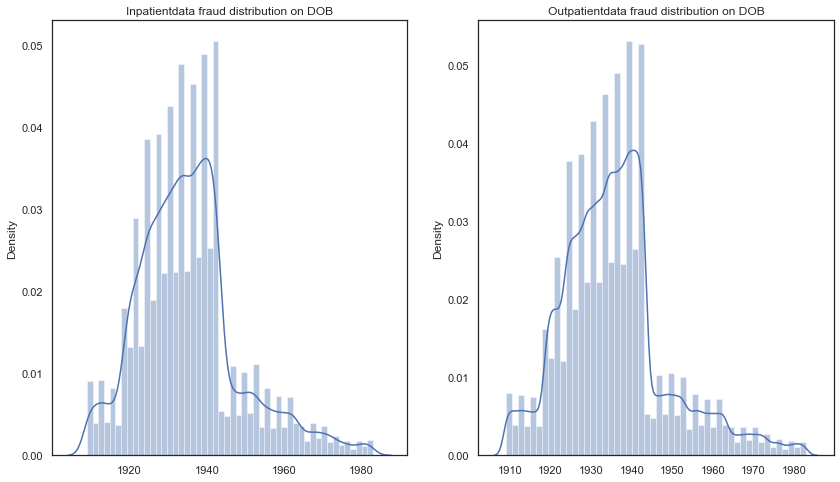

In [361]:
fig ,axes= plt.subplots(1,2,figsize=(14,8))

#x =sns.countplot(data =df_ben_in,x='DOB_year', hue='PotentialFraud', ax=axes[0])
x =sns.distplot(x=df_ben_in['DOB_year'],ax=axes[0])
x.title.set_text('Inpatientdata fraud distribution on DOB')
y= sns.distplot(x=df_ben_out['DOB_year'], ax=axes[1])
y.title.set_text('Outpatientdata fraud distribution on DOB')
plt.show()

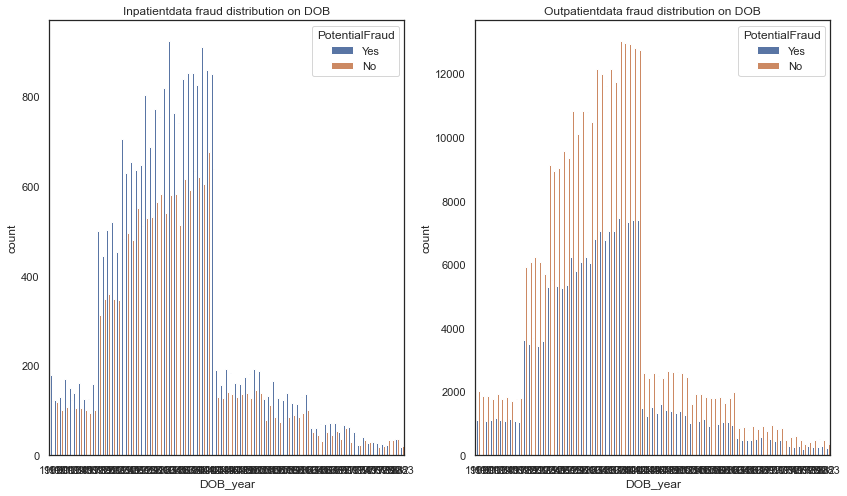

In [362]:
fig ,axes= plt.subplots(1,2,figsize=(14,8))

x =sns.countplot(data =df_ben_in,x='DOB_year', hue='PotentialFraud', ax=axes[0])
x.title.set_text('Inpatientdata fraud distribution on DOB')
y =sns.countplot(data =df_ben_out,x='DOB_year', hue='PotentialFraud', ax=axes[1])
y.title.set_text('Outpatientdata fraud distribution on DOB')
plt.show()

# Potential Fraud distribution with respect to Gender

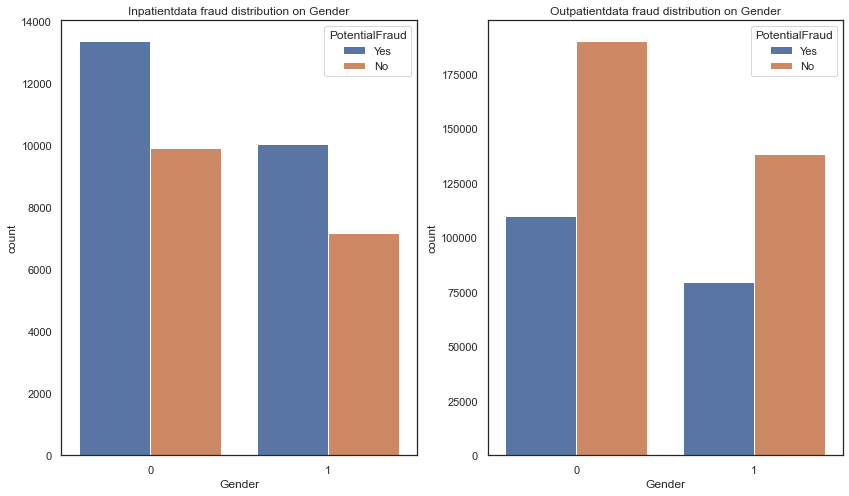

In [364]:
fig ,axes= plt.subplots(1,2,figsize=(14,8))

x =sns.countplot(data =df_ben_in,x='Gender', hue='PotentialFraud', ax=axes[0])
x.title.set_text('Inpatientdata fraud distribution on Gender')
y =sns.countplot(data =df_ben_out,x='Gender', hue='PotentialFraud', ax=axes[1])
y.title.set_text('Outpatientdata fraud distribution on Gender')
plt.show()

## Potential Fraud distribution with respect to  NO of days admitted 

In [340]:

df_ben_in['AdmissionDt']= pd.to_datetime(df_ben_in['AdmissionDt'])
df_ben_in['DischargeDt']= pd.to_datetime(df_ben_in['DischargeDt'])
df_ben_in['numOfDaysAdmitted'] = df_ben_in['DischargeDt'] - df_ben_in['AdmissionDt']

In [341]:
df_ben_in['numOfDaysAdmitted'] = df_ben_in['numOfDaysAdmitted'].dt.days.astype('int64')

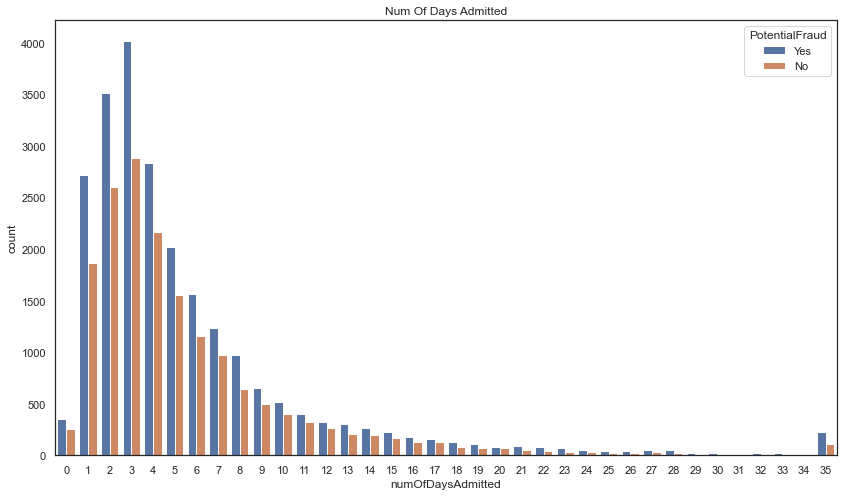

In [342]:
plt.figure(figsize=(14,8))
x = sns.countplot(x='numOfDaysAdmitted',data=df_ben_in,hue='PotentialFraud')
x.title.set_text('Num Of Days Admitted')
plt.show()

# Potential Fraud distribution with respect to InscClaimAmtReimbursed

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


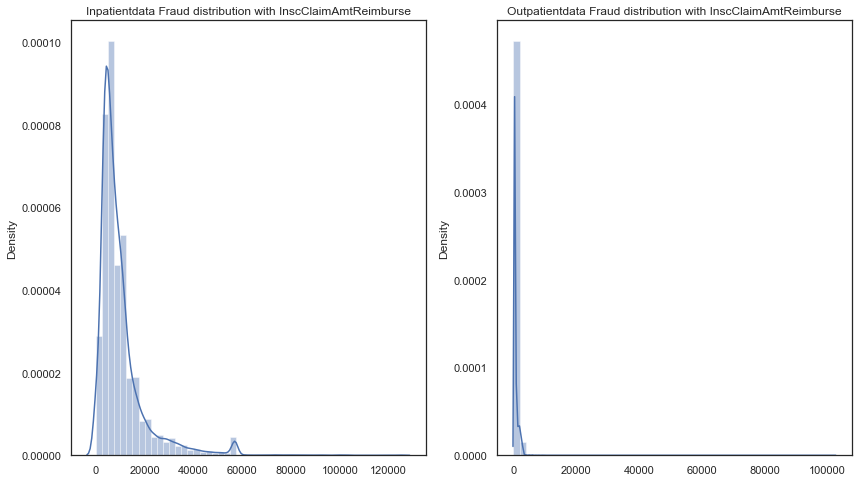

In [365]:
fig ,axes= plt.subplots(1,2,figsize=(14,8))

x =sns.distplot(x=df_ben_in['InscClaimAmtReimbursed'], ax=axes[0])
x.title.set_text('Inpatientdata Fraud distribution with InscClaimAmtReimburse')
y= sns.distplot(x=df_ben_out['InscClaimAmtReimbursed'], ax=axes[1])
y.title.set_text('Outpatientdata Fraud distribution with InscClaimAmtReimburse')
plt.show()

# Potential Fraud distribution with respect to IscClaimAmtReimbursed and IPAnnualReimbursementAmt and OPAnnualReimbursementAmt

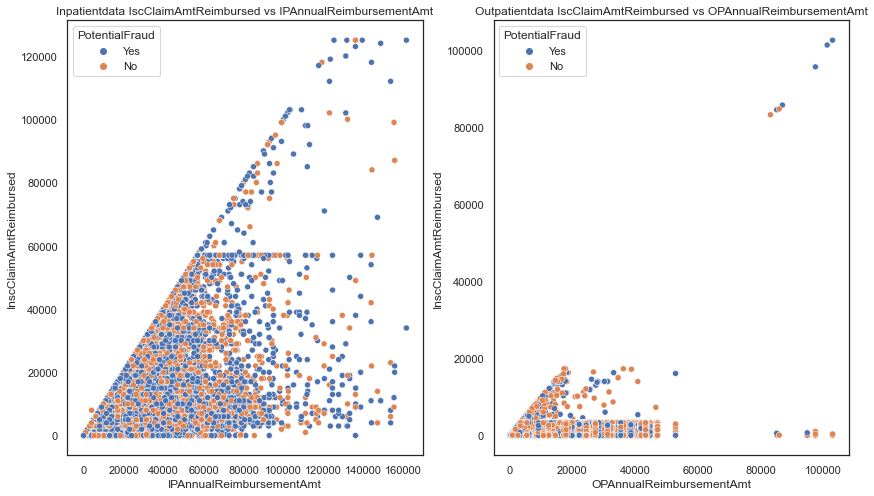

In [368]:
fig ,axes= plt.subplots(1,2,figsize=(14,8))

x =sns.scatterplot(data=df_ben_in,x= 'IPAnnualReimbursementAmt',y='InscClaimAmtReimbursed',hue='PotentialFraud',ax=axes[0])
x.title.set_text('Inpatientdata IscClaimAmtReimbursed vs IPAnnualReimbursementAmt')

y =sns.scatterplot(data=df_ben_out ,x= 'OPAnnualReimbursementAmt',y='InscClaimAmtReimbursed',hue='PotentialFraud',ax=axes[1])
y.title.set_text('Outpatientdata IscClaimAmtReimbursed vs OPAnnualReimbursementAmt')
plt.show()

# Potential Fraud Amount

In [369]:
total_in = df_ben_in[df_ben_in['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()
total_out =df_ben_out[df_ben_out['PotentialFraud']== 'Yes'].InscClaimAmtReimbursed.sum()

In [370]:
print('Potential Fraud Amount',total_in+total_out )

Potential Fraud Amount 295681120
